In [1]:
# Libraries
import numpy as np
import scipy.io as sio
import os
import pickle
# import re
import ieeg_funcs as ief
import dgFuncs as dg
import euGenFuncs as eu
from sklearn import preprocessing
# from scipy import stats
# from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import svm, linear_model
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
sub=[442]
path_dict=ief.get_path_dict()
ftr='SE'
ftr_root=path_dict['eu_gen_ftrs']
ftr_info_dict=eu.data_size_and_fnames(sub, ftr_root, ftr)

Working on sub 442
6 non-szr files found
68 szr files found
88288 total # of NON-szr time windows for this sub
87973 total # of SZR time windows for this sub


In [3]:
n_dim=ftr_info_dict['ftr_dim']
n_non_wind=ftr_info_dict['grand_n_non_wind']
n_szr_wind=ftr_info_dict['grand_n_szr_wind']
n_wind=n_non_wind+n_szr_wind
print('Total # of dimensions: %d ' % n_dim)
print('Total # of szr time windows: %d ' % n_szr_wind)
print('Total # of non-szr time windows: %d ' % n_non_wind)
print('Total # of time windows: %d ' % n_wind)
ftrs, szr_class, sub_id=eu.import_data(ftr_info_dict['grand_szr_fnames'], ftr_info_dict['grand_non_fnames'],
                                       ftr_info_dict['szr_file_subs'],ftr_info_dict['non_file_subs'],
                                       n_szr_wind, n_non_wind, n_dim)

Total # of dimensions: 30 
Total # of szr time windows: 87973 
Total # of non-szr time windows: 88288 
Total # of time windows: 176261 
442_HRA4-HRA5
Loading file /home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/442/442_HRA4_HRA5_non.mat
442_TBA2-TBA3
Loading file /home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/442/442_TBA2_TBA3_non.mat
442_TBA1-TBA2
Loading file /home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/442/442_TBA1_TBA2_non.mat
442_TBA3-TBA4
Loading file /home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/442/442_TBA3_TBA4_non.mat
442_HRA5-HRA6
Loading file /home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/442/442_HRA5_HRA6_non.mat
442_HRA3-HRA4
Loading file /home/dgroppe/GIT/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/442/442_HRA3_HRA4_non.mat


Done!


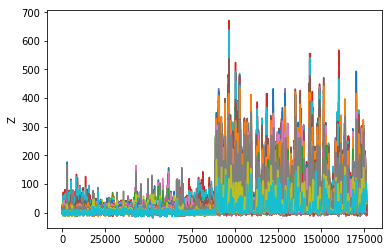

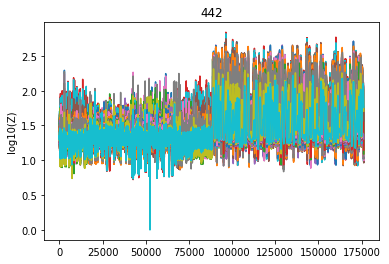

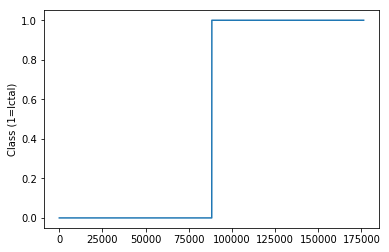

In [4]:
plt.figure(1)
plt.clf()
plt.plot(ftrs)
plt.ylabel('Z')

plt.figure(3)
plt.clf()
plt.plot(np.log10(ftrs-np.min(ftrs)+1))
plt.ylabel('log10(Z)')
plt.title(str(sub[0]))

plt.figure(2)
plt.clf()
plt.plot(szr_class)
plt.ylabel('Class (1=Ictal)')
print('Done!')

In [7]:
for a in np.arange(0.1,0.5,0.1):
    print(a)

0.1
0.2
0.3
0.4


In [90]:
np.min(ftrs-np.min(ftrs))

0.0